In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from typing import Optional, Sequence
from coba.experiments.results import CustomResult
import numpy as np

from coba import CobaRandom, Environments, RandomLearner, Experiment, VowpalSoftmaxLearner, VowpalBagLearner, \
    VowpalEpsilonLearner, SimpleEvaluation
from coba import VowpalCoverLearner, VowpalRegcbLearner, VowpalSquarecbLearner, VowpalOffPolicyLearner, CorralLearner
from coba.environments import LambdaSimulation
# from coba.experiments.tasks import SimpleEvaluation
from coba.primitives import Context, Action

# Run Simulation

In [ ]:
import pandas as pd
source_df = pd.read_csv("lambda_logs_6.csv")
# Uncomment to utilze rewards 
# source_df.rename(columns={"rewards": "xxx"}, inplace=True)

In [ ]:
from coba.environments.banditreplay import BanditReplay

environments = Environments([BanditReplay(source_df, take=5000, actions=[0,1])]).shuffle(n=4)
learners = [
    VowpalEpsilonLearner(features=[1, 'x', 'a', 'ax']),
    VowpalSoftmaxLearner(features=[1, 'x', 'a', 'ax']),
    VowpalBagLearner(features=[1, 'x', 'a', 'ax']),
    VowpalOffPolicyLearner(features=[1, 'x', 'a', 'ax']),
]

learners.append(RandomLearner())

result = Experiment(
    environments,
    learners,
    evaluation_task=SimpleEvaluation(record=['reward','probability','action','context', 'ope_loss'])
).run()
result.__class__ = CustomResult

In [ ]:
result.plot_learners()

In [ ]:
# without rewards
result.eval_metrics()

In [ ]:
df = result.interactions.to_pandas()
d = df[(df['environment_id'] == 0) & (df['learner_id'] == 0)]

In [ ]:
d.hist(column='action', bins=20)

In [ ]:
source_df.hist(column='action', bins=20)

In [19]:
df = result.interactions.to_pandas()
d = df[(df['environment_id'] == 0) & (df['learner_id'] == 0)]

array([[<AxesSubplot: title={'center': 'action'}>]], dtype=object)

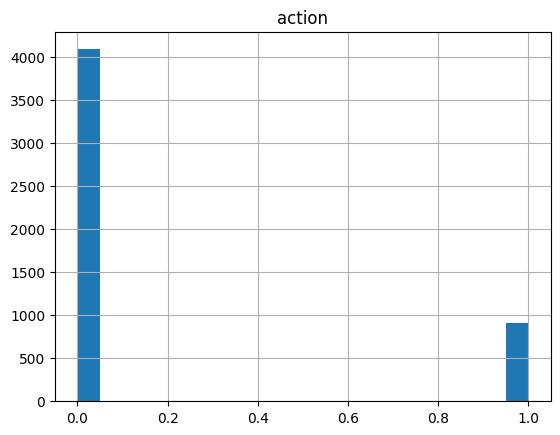

In [21]:
d.hist(column='action', bins=20)

array([[<AxesSubplot: title={'center': 'action'}>]], dtype=object)

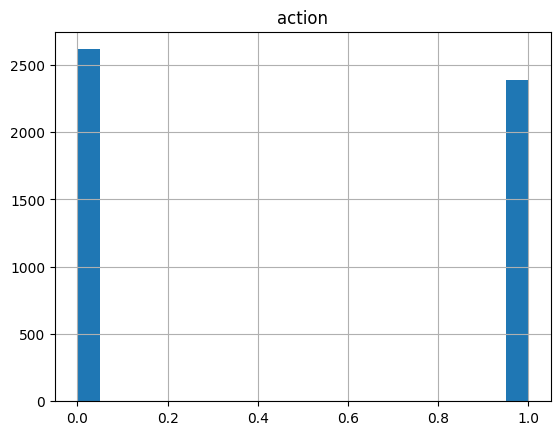

In [22]:
source_df.hist(column='action', bins=20)